[Table of Contents](#TOC)

[Introduction](#init)

[1. Importing Libraries +Bring in Data](#initexp)

>[1.1 Importing Libraries](#initexp1)

>[1.2 Loading Data](#initexp2)

>[1.3 Description of the Time-Series Dataset](#initexp3)

>[1.4 Description of the Qualitative Dataset](#initexp4)

>[1.5 Missing values](#initexp5)

>[1.6 Merging Datasets](#initexp6)

>[1.7 Datetime features](#initexp7)

>[1.8 Outliers Detection and Treatment](#initexp8)

>[1.9 Stationary Test](#initexp9)

>[1.10 Autocorrelation Plots](#initexp10)

>[1.11 Encoding Categorical Variables](#initexp11)

>[1.12 Splitting Data](#initexp12)

>[1.13 Creating Lag and Rolling features](#initexp13)

[2.0 Model Selection](#initexp111)

[3.0 The Other Models](#initexp19)

>[3.1 Prophet Model](#initexp20)

>>[3.1 Target Variable- Total Inside Sales](#initexp21)

>>[3.2 Target Variable- Total Food Sales](#initexp22)

>>[3.3 Target Variable- Diesel Sales](#initexp23)

>>[3.4 Target Variable- Unleaded Sales](#initexp24)

[Summary](#initexp28)

[Conclusion](#initexp29)

[Contributions](#initexp30)

>[Vinay Kumar Vascuri](#initexp34)


# <a name = "init"> **Introduction**

In the fast-paced world of retail, businesses often experience the challenge of balancing high growth ambitions with the need for accurate forecasts to make well-informed financial decisions. Maverik, a thriving retail brand, is no exception. With plans to open or build 30 new stores each year, Maverik's high-growth trajectory requires precise first-year sales forecasts. These forecasts serve as the cornerstone for building effective financial plans, optimizing resource allocation, and providing a benchmark to assess store performance against projected outcomes. The success of this endeavor hinges on two primary factors: achieving a Return on Investment (ROI) that closely matches forecasted ROI and consistently attaining accurate sales metric forecasts as new sales data becomes available.

To address this critical business challenge, Maverik has embarked on a data-driven journey, combining the power of qualitative and time series data to develop a sophisticated time series forecasting model in Python. This model leverages qualitative insights from recent new store openings, network-wide seasonality patterns, and a diverse set of sales metrics. It will employ a variety of machine learning algorithms to generate daily-level forecasts, enabling Maverik to make precise financial and operational decisions.

The scope of this project encompasses the end-to-end development of the time series forecasting model. It will incorporate qualitative data, network-wide seasonality patterns, and other relevant factors to deliver accurate forecasts for the first year of sales for new stores.

This series of modeling tasks will explore the utilization of machine learning techniques to create a forecasting model tailored to Maverik's unique needs. It aims to provide Maverik with the insights and tools necessary to maintain its impressive growth while making data-driven decisions that foster long-term success.

## <a name = "initexp">1. Importing Libraries + Bring in Data</a>

## <a name = "initexp1">1.1 Importing Libraries</a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/maverik-capstone') # changing the default directory

## <a name = "initexp2"> 1.2 Loading Data</a>

In [ ]:
qualitative_data_path = 'qualitative_data_msba.csv'
df_qdm = pd.read_csv(qualitative_data_path, index_col=0)

time_series_data_path = 'time_series_data_msba.csv'
df_tsdm = pd.read_csv(time_series_data_path, index_col=0)

## <a name = "initexp3"> 1.3 Description of Time-Series Dataset

In [ ]:
df_tsdm.head()

,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba
1,6/14/2022,6/17/2022,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,24535
2,6/14/2022,6/22/2022,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,24535
3,6/14/2022,6/23/2022,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,24535
4,6/14/2022,6/26/2022,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,24535
5,6/14/2022,6/27/2022,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,24535


In [ ]:
df_tsdm.columns

Index(['capital_projects.soft_opening_date', 'calendar.calendar_day_date',
       'calendar.fiscal_week_id_for_year', 'calendar.day_of_week',
       'calendar_information.holiday', 'calendar_information.type_of_day',
       'daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service',
       'diesel', 'unleaded', 'site_id_msba'],
      dtype='object')

In [ ]:
df_tsdm.shape

(13908, 11)

In [ ]:
df_tsdm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13908 entries, 1 to 13908
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   capital_projects.soft_opening_date  13908 non-null  object 
 1   calendar.calendar_day_date          13908 non-null  object 
 2   calendar.fiscal_week_id_for_year    13908 non-null  int64  
 3   calendar.day_of_week                13908 non-null  object 
 4   calendar_information.holiday        13908 non-null  object 
 5   calendar_information.type_of_day    13908 non-null  object 
 6   daily_yoy_ndt.total_inside_sales    13908 non-null  float64
 7   daily_yoy_ndt.total_food_service    13908 non-null  float64
 8   diesel                              13908 non-null  float64
 9   unleaded                            13908 non-null  float64
 10  site_id_msba                        13908 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory

In [ ]:
df_tsdm.describe()

,calendar.fiscal_week_id_for_year,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba
count,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000
mean,26.501079,2846.537988,759.922326,1702.585227,2382.091588,23041.052632
std,14.998715,981.299870,341.578220,2161.208192,1025.518658,710.634218
min,1.000000,0.000000,0.000000,0.000000,240.180500,21560.000000
25%,14.000000,2181.156250,521.087875,383.062750,1654.149000,22540.000000
50%,26.000000,2693.976250,697.434500,1018.920000,2256.677500,22907.500000
75%,39.000000,3325.306250,924.282625,2283.297625,2928.254000,23555.000000
max,52.000000,7172.466000,2531.662000,20853.952000,8077.233500,24535.000000


## <a name = "initexp4"> 1.4 Description of Qualitative Dataset

In [ ]:
df_qdm.head()

,open_year,square_feet,front_door_count,years_since_last_project,parking_spaces,lottery,freal,bonfire_grill,pizza,cinnabon,...,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,non_24_hour,self_check_out,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba
1,2021,5046,2,2,38,Yes,Yes,Yes,No,No,...,6,Stack,HF/RV,No,Yes,2,2,6,2,21560
2,2021,5046,2,2,39,No,Yes,Yes,Yes,No,...,4,Combo,HF/RV,No,Yes,5,5,10,4,21980
3,2021,5046,2,2,35,Yes,Yes,Yes,Yes,No,...,5,In-Line,None,No,Yes,3,2,4,1,22015
4,2021,5046,2,2,36,No,Yes,Yes,Yes,No,...,4,Combo,HF/RV,No,Yes,3,3,6,2,22085
5,2021,5046,2,2,25,Yes,Yes,Yes,No,No,...,0,NaN,NaN,No,Yes,0,0,0,0,22120


In [ ]:
df_qdm.columns

Index(['open_year', 'square_feet', 'front_door_count',
       'years_since_last_project', 'parking_spaces', 'lottery', 'freal',
       'bonfire_grill', 'pizza', 'cinnabon', 'godfather_s_pizza',
       'ethanol_free', 'diesel', 'hi_flow_lanes', 'rv_lanes',
       'hi_flow_rv_lanes', 'def', 'cat_scales', 'car_wash', 'ev_charging',
       'rv_dumps', 'propane', 'x1_mile_pop', 'x1_mile_emp', 'x1_mile_income',
       'x1_2_mile_pop', 'x1_2_mile_emp', 'x1_2_mile_income', 'x5_min_pop',
       'x5_min_emp', 'x5_min_inc', 'x7_min_pop', 'x7_min_emp', 'x7_min_inc',
       'traditional_forecourt_fueling_positions',
       'traditional_forecourt_layout', 'traditional_forecourt_stack_type',
       'rv_lanes_fueling_positions', 'rv_lanes_layout', 'rv_lanes_stack_type',
       'hi_flow_lanes_fueling_positions', 'hi_flow_lanes_layout',
       'hi_flow_lanes_stack_type', 'hi_flow_lanes_fueling_positions_2',
       'rv_lanes_fueling_positions_2', 'hi_flow_rv_lanes_layout',
       'hi_flow_rv_lanes_stack_

In [ ]:
df_qdm.shape

(37, 54)

In [ ]:
df_qdm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 1 to 37
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   open_year                                37 non-null     int64 
 1   square_feet                              37 non-null     int64 
 2   front_door_count                         37 non-null     int64 
 3   years_since_last_project                 37 non-null     int64 
 4   parking_spaces                           37 non-null     int64 
 5   lottery                                  37 non-null     object
 6   freal                                    37 non-null     object
 7   bonfire_grill                            37 non-null     object
 8   pizza                                    37 non-null     object
 9   cinnabon                                 37 non-null     object
 10  godfather_s_pizza                        37 non-null     object


In [ ]:
df_qdm.describe()

,open_year,square_feet,front_door_count,years_since_last_project,parking_spaces,x1_mile_pop,x1_mile_emp,x1_mile_income,x1_2_mile_pop,x1_2_mile_emp,...,traditional_forecourt_fueling_positions,rv_lanes_fueling_positions,hi_flow_lanes_fueling_positions,hi_flow_lanes_fueling_positions_2,rv_lanes_fueling_positions_2,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba
count,37.000000,37.00000,37.0,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,2021.324324,4970.27027,2.0,1.648649,37.405405,6703.567568,4757.648649,53300.378378,1833.108108,1514.135135,...,14.270270,2.513514,3.324324,3.324324,2.513514,2.378378,2.351351,4.648649,1.702703,23040.405405
std,0.474579,575.93121,0.0,0.483978,5.918237,5694.011350,4697.168291,24333.027254,1915.140476,2489.423094,...,3.948619,2.049683,2.925501,2.925501,2.049683,0.923500,0.856875,1.751447,0.740303,730.069801
min,2021.000000,2933.00000,2.0,1.000000,23.000000,0.000000,56.000000,0.000000,0.000000,31.000000,...,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21560.000000
25%,2021.000000,5046.00000,2.0,1.000000,34.000000,1984.000000,1771.000000,39538.000000,262.000000,386.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,1.000000,22540.000000
50%,2021.000000,5046.00000,2.0,2.000000,38.000000,5574.000000,3895.000000,46356.000000,1003.000000,1037.000000,...,12.000000,4.000000,5.000000,5.000000,4.000000,2.000000,2.000000,4.000000,2.000000,22890.000000
75%,2022.000000,5046.00000,2.0,2.000000,41.000000,11269.000000,6002.000000,73519.000000,2686.000000,1616.000000,...,16.000000,4.000000,5.000000,5.000000,4.000000,3.000000,3.000000,6.000000,2.000000,23555.000000
max,2022.000000,6134.00000,2.0,2.000000,49.000000,18692.000000,26077.000000,110957.000000,5923.000000,15403.000000,...,24.000000,6.000000,9.000000,9.000000,6.000000,5.000000,5.000000,10.000000,4.000000,24535.000000


## <a name = "initexp5"> 1.5 Missing Values

In [ ]:
# Calculate the number of missing values for each column in the qualitative DataFrame
missing_qualitative = df_qdm.isnull().sum()

# Calculate the number of missing values for each column in the time series DataFrame
missing_time_series = df_tsdm.isnull().sum()



In [ ]:
# Show columns from the qualitative DataFrame that have any missing values
missing_qualitative[missing_qualitative > 0]

rv_lanes_layout                14
rv_lanes_stack_type            14
hi_flow_lanes_layout           15
hi_flow_lanes_stack_type       15
hi_flow_rv_lanes_layout        14
hi_flow_rv_lanes_stack_type    14
dtype: int64

In [ ]:
# Check unique values in columns with missing values in qualitative DataFrame
print('rv_lanes_layout Unique values: ', df_qdm['rv_lanes_layout'].unique())
print('rv_lanes_stack_type Unique values: ', df_qdm['rv_lanes_stack_type'].unique())
print('hi_flow_lanes_layout Unique values: ', df_qdm['hi_flow_lanes_layout'].unique())
print('hi_flow_lanes_stack_type Unique values: ', df_qdm['hi_flow_lanes_stack_type'].unique())
print('hi_flow_rv_lanes_layout Unique values: ', df_qdm['hi_flow_rv_lanes_layout'].unique())
print('hi_flow_rv_lanes_stack_type Unique values: ', df_qdm['hi_flow_rv_lanes_stack_type'].unique())

rv_lanes_layout Unique values:  ['Stack' 'In-Line' nan]
rv_lanes_stack_type Unique values:  ['HF/RV' 'None' nan]
hi_flow_lanes_layout Unique values:  ['Stack' 'Combo' nan]
hi_flow_lanes_stack_type Unique values:  ['HF/RV' nan]
hi_flow_rv_lanes_layout Unique values:  ['Stack' 'Combo' 'In-Line' nan]
hi_flow_rv_lanes_stack_type Unique values:  ['HF/RV' 'None' nan]


In [ ]:
# Fill all Missing values in the qualitative DataFrame with a new category 'None'
df_qdm = df_qdm.fillna('None')

In [ ]:
# Show columns from the qualitative DataFrame that have any missing values
missing_time_series[missing_time_series > 0]

Series([], dtype: int64)

1. Since the missing values in the qualitative DataFrame are mostly categorical and can be interpreted as **not present**. We are imputing a new **'None'** Category in place of null values.
2. There are no missing values in the time-series DataFrame

## <a name = "initexp6"> 1.6 Merging Datasets

In [ ]:
merged_df = pd.merge(df_tsdm, df_qdm, on='site_id_msba', how='inner')

## <a name = "initexp7"> 1.7 Datetime features



In [ ]:
# Convert date columns to datetime format
merged_df['calendar.calendar_day_date'] = pd.to_datetime(merged_df['calendar.calendar_day_date'])
merged_df['capital_projects.soft_opening_date'] = pd.to_datetime(merged_df['capital_projects.soft_opening_date'])

# Sort Values by site id and calendar day date
merged_df = merged_df.sort_values(['site_id_msba', 'calendar.calendar_day_date'])

# Create new fetaures based on the existing date features
merged_df['day_of_week'] = merged_df['calendar.calendar_day_date'].dt.dayofweek
merged_df['calendar_year'] = merged_df['calendar.calendar_day_date'].dt.year
merged_df['calendar_month'] = merged_df['calendar.calendar_day_date'].dt.month
merged_df['calendar_day'] = merged_df['calendar.calendar_day_date'].dt.day


## <a name = "initexp8"> 1.8 Outliers Detection and Treatment


In [ ]:
# Function to detect outliers
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

target_features = ["daily_yoy_ndt.total_inside_sales", "daily_yoy_ndt.total_food_service", "diesel_x", "unleaded"]
outliers_info = {}

# Detecting outliers for each target feature
for feature in target_features:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(merged_df, feature)
    outliers_info[feature] = {
        "outliers_count": outliers.shape[0],
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outliers_index": outliers.index
    }

# Outliers information for each target variable
outliers_summary = pd.DataFrame(outliers_info).T[['outliers_count', 'lower_bound', 'upper_bound']]
outliers_summary

,outliers_count,lower_bound,upper_bound
daily_yoy_ndt.total_inside_sales,490,451.423875,5068.637875
daily_yoy_ndt.total_food_service,517,-84.042,1541.967
diesel_x,640,-2480.291625,5198.477375
unleaded,326,-304.937062,4904.032438


In [ ]:
# Capping the outliers to the upper and lower bounds for each target feature
for feature in target_features:
    lower_bound = outliers_info[feature]['lower_bound']
    upper_bound = outliers_info[feature]['upper_bound']

    merged_df[feature] = merged_df[feature].clip(lower=lower_bound, upper=upper_bound)

# Check the data to ensure the capping was applied
merged_df_describe = merged_df[target_features].describe()

merged_df_describe

,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel_x,unleaded
count,13542.000000,13542.000000,13542.000000,13542.000000
mean,2831.571136,756.807500,1557.357496,2371.155283
std,924.481068,313.037819,1410.406522,978.457952
min,451.423875,0.000000,12.498500,240.180500
25%,2182.879125,525.711375,399.246750,1648.426500
50%,2694.347250,705.759250,1083.677000,2263.154250
75%,3337.182625,932.213625,2318.939000,2950.668875
max,5068.637875,1541.967000,5198.477375,4904.032438


A considerable number of outliers were found for each of the target variables when the IQR method's 1.5 multiplier was used for outlier detection. This finding raises the possibility of either a significant variation in the data or a high sensitivity of this method to the features of the dataset. With a large range between the lower and upper bounds, the descriptive statistics performed prior to capping suggested that these outliers might have an impact on the overall profile of the dataset. Following capping, the dataset was shown to have less variability and possibly more stability for further analysis based on the lower standard deviation and the alignment of maximum values with the upper bounds. **During the modeling process**, we can determine if there is a significant effect of outliers on the residuals.

## <a name = "initexp9"> 1.9 Stationarity Test

In [ ]:
# Function to perform the Augmented Dickey-Fuller test
def adf_test(series, feature_name):
    result = adfuller(series, autolag='AIC')
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    return {
        "Feature": feature_name,
        "ADF Statistic": adf_statistic,
        "p-value": p_value,
        "Critical Values": critical_values,
        "Stationarity": p_value < 0.05  # If p-value < 0.05, we reject the null hypothesis (series is stationary)
    }

# Applying the ADF test on the target features
adf_results = pd.DataFrame([adf_test(merged_df[feature], feature) for feature in target_features])
adf_results[['Feature', 'ADF Statistic', 'p-value', 'Stationarity']]


,Feature,ADF Statistic,p-value,Stationarity
0,daily_yoy_ndt.total_inside_sales,-5.972455,1.921862e-07,True
1,daily_yoy_ndt.total_food_service,-4.959112,2.672214e-05,True
2,diesel_x,-5.228578,7.684673e-06,True
3,unleaded,-5.464509,2.476066e-06,True


All variables show evidence of **stationarity,** according to the results of the **Augmented Dickey-Fuller(ADF)** **test** applied to the target features, as each variable's test statistics are below the critical values and its p-value is significantly below the 0.05 threshold.

This implies that these variables time series data do not have unit roots and are stable over time, indicating that their statistical characteristics such as variance and mean are not time-dependent.


## <a name = "initexp10"> 1.10 Autocorrelation Plots

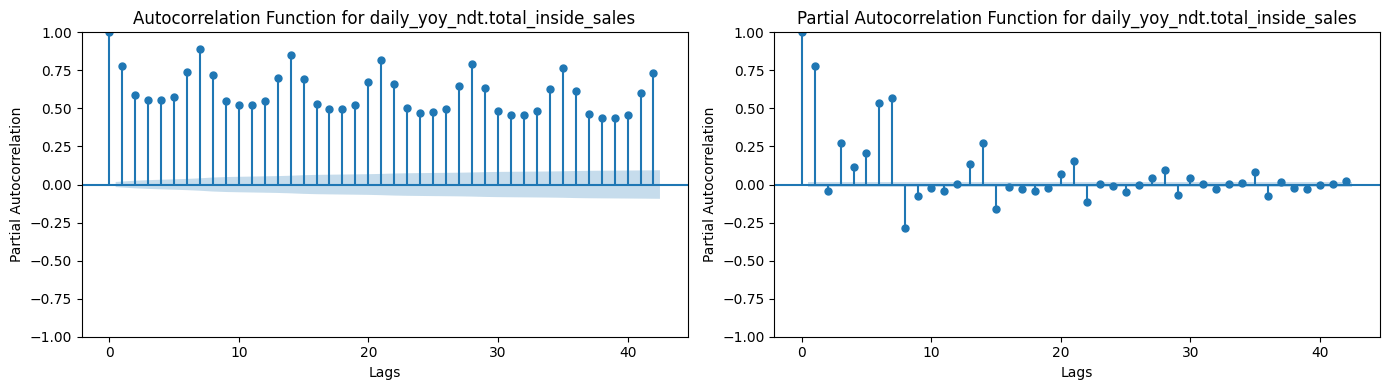

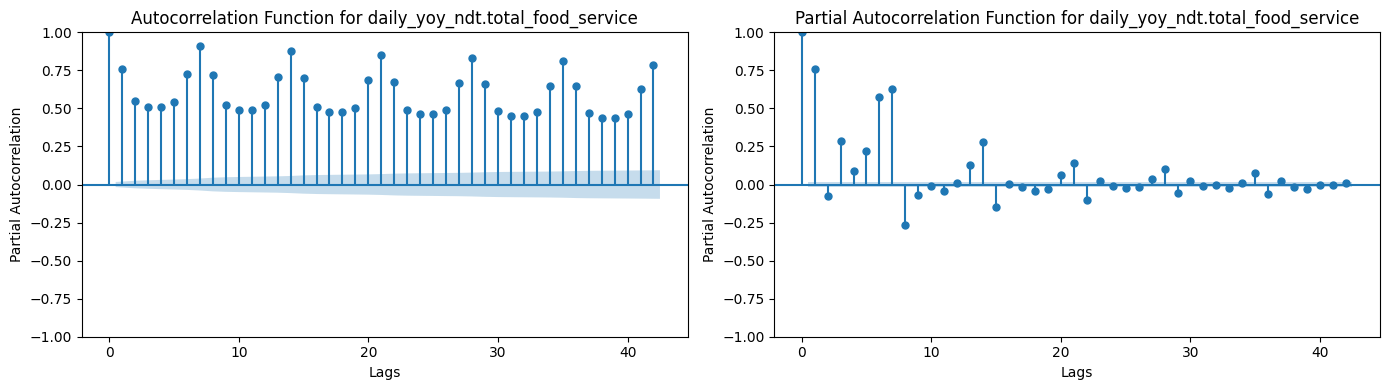

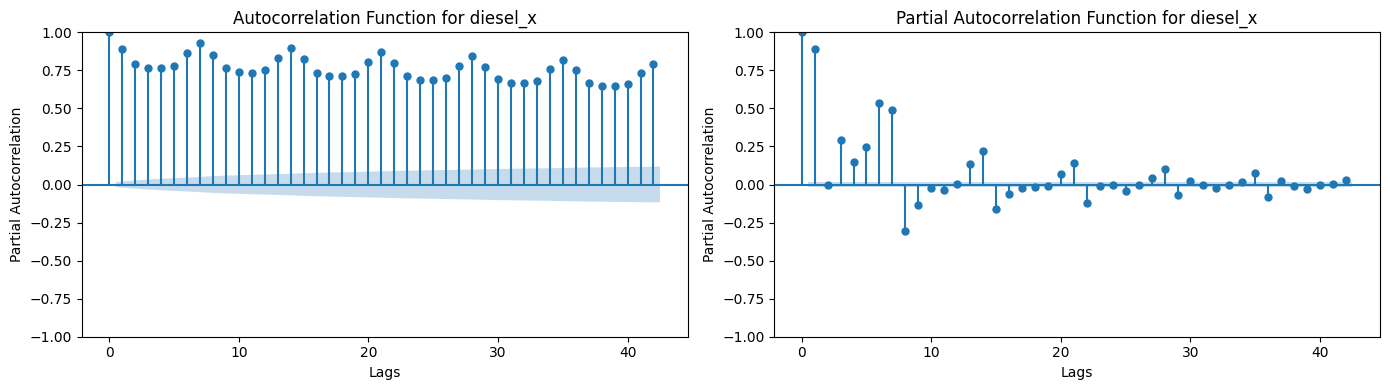

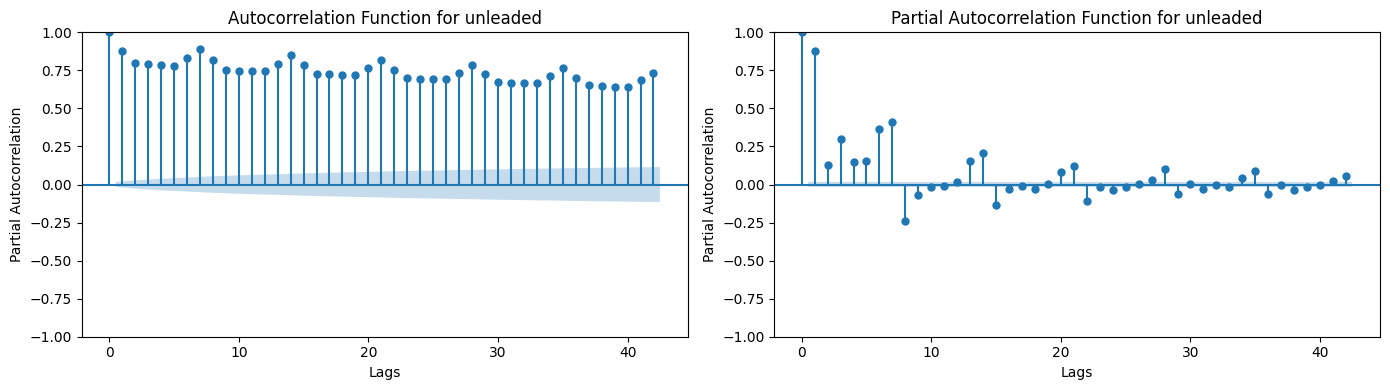

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Funtion to plot Autocorrelation plots
def plot_auto_correlation_plots(target):
# Create subplots with 1 row and 2 columns
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

  # Plot Autocorrelation Function (ACF)
  plot_acf(merged_df[target], ax=axes[0])
  axes[0].set_title(f'Autocorrelation Function for {target}')
  axes[0].set_xlabel('Lags')  # Set x-axis label
  axes[0].set_ylabel('Partial Autocorrelation')

  # Plot Partial Autocorrelation Function (PACF)
  plot_pacf(merged_df[target], ax=axes[1])
  axes[1].set_title(f'Partial Autocorrelation Function for {target}')
  axes[1].set_xlabel('Lags')  # Set x-axis label
  axes[1].set_ylabel('Partial Autocorrelation')

  # Show the plots
  plt.tight_layout()
  plt.show()

# Iterate through the target features to plot the autocorrelation plots
target_features = ["daily_yoy_ndt.total_inside_sales", "daily_yoy_ndt.total_food_service", "diesel_x", "unleaded"]
for target in target_features:
  plot_auto_correlation_plots(target)

The ACF plots for both **"daily_yoy_ndt.total_inside_sales" and "daily_yoy_ndt.total_food_service"** indicate a **strong positive correlation at lag 1** that gradually declines, yet remains significant across many lags, suggesting non-stationarity and a potential trend or seasonal pattern in the data. The PACF plot for "total_inside_sales" shows a significant spike at lag 1 and then cuts off, whereas the "total_food_service" PACF plot suggests a less clear AR structure with significant lags occurring at various intervals. Both datasets are likely to benefit from differencing to remove the non-stationary components and may require seasonal adjustment given the repeating patterns in the ACF. The autocorrelation function (ACF) plots for both "diesel_x" and "unleaded" show a very gradual decline in the correlations as lags increase, which implies a strong persistent autocorrelation over time, indicative of a non-stationary time series.

## <a name = "initexp11"> 1.11 Encoding Categorical variables




In [ ]:
# Create a list of categorical columns
categorical_columns = list(merged_df.select_dtypes(include=['object']).columns)

In [ ]:
# One-Hot Encoding for categorical variables
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical_columns = pd.DataFrame(
    one_hot_encoder.fit_transform(merged_df[categorical_columns]),
    index=merged_df.index
)

# Join the encoded columns back to the dataframe
merged_df = merged_df.join(encoded_categorical_columns).drop(columns=categorical_columns)

# Display head for encoded DataFrame
merged_df.head()


,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel_x,unleaded,site_id_msba,open_year,square_feet,...,48,49,50,51,52,53,54,55,56,57
13447,2021-01-12,2021-01-12,2,2036.2685,762.8530,1424.1850,1522.0030,21560,2021,5046,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13448,2021-01-12,2021-01-13,2,2379.8880,1003.7930,1303.8445,1853.7715,21560,2021,5046,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13449,2021-01-12,2021-01-14,2,2435.8600,974.2250,1375.6785,2122.4070,21560,2021,5046,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13359,2021-01-12,2021-01-15,3,2805.9780,911.0115,1334.9175,2267.9930,21560,2021,5046,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13450,2021-01-12,2021-01-16,3,2314.7635,715.7535,831.1625,1819.6395,21560,2021,5046,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## <a name = "initexp12">1.12 Splitting Data into Train and Test

In [ ]:

# Get a list of unique stores
unique_stores_list = merged_df['site_id_msba'].unique()

# Split the stores into training and testing sets
train_stores, test_stores = train_test_split(unique_stores_list, test_size=5, random_state=42)  # Using a fixed random state for reproducibility

# Split the data into training and testing based on the stores
train_data_og = merged_df[merged_df['site_id_msba'].isin(train_stores)]
test_data_og = merged_df[merged_df['site_id_msba'].isin(test_stores)]


# Let's check the number of entries in the training and testing sets
len_train = len(train_data_og)
len_test = len(test_data_og)
(len_train, len_test)

(11712, 1830)

## <a name = "initexp13">1.13 Creating Lag and Rolling features

Lag and rolling features are commonly used in time-series analysis and forecasting. These features involve using historical data to generate new features that can provide insights into trends, patterns, or relationships within a dataset

In [ ]:
def create_lag_features(target_variable):
  # Creating lagged features for up to 7 days
  train_data = train_data_og.copy()
  test_data = test_data_og.copy()
  for lag in range(1, 8):
      train_data[f"{target_variable}_lag_{lag}"] = train_data[target_variable].shift(lag)
      test_data[f"{target_variable}_lag_{lag}"] = test_data[target_variable].shift(lag)

  # Creating rolling window features (7 days and 30 days)
  train_data[f'{target_variable}_rolling_7_mean'] = train_data[target_variable].rolling(window=7).mean()
  train_data[f'{target_variable}_rolling_30_mean'] = train_data[target_variable].rolling(window=30).mean()
  train_data[f'{target_variable}_rolling_7_std'] = train_data[target_variable].rolling(window=7).std()
  train_data[f'{target_variable}_rolling_30_std'] = train_data[target_variable].rolling(window=30).std()

  test_data[f'{target_variable}_rolling_7_mean'] = test_data[target_variable].rolling(window=7).mean()
  test_data[f'{target_variable}_rolling_30_mean'] = test_data[target_variable].rolling(window=30).mean()
  test_data[f'{target_variable}_rolling_7_std'] = test_data[target_variable].rolling(window=7).std()
  test_data[f'{target_variable}_rolling_30_std'] = test_data[target_variable].rolling(window=30).std()

  # The first few rows will have NaN values due to lagging and rolling, so we drop them.
  train_data.dropna(inplace=True)
  test_data.dropna(inplace=True)

  return train_data, test_data

In [ ]:
pd.set_option('display.max_colwidth', None)

The **create_lag_features** function generates lag and rolling features for a given target variable in time-series data. It starts by creating lagged features for the target variable spanning up to 7 days, both for the training and test datasets. Following that, **rolling window features** are computed, including the 7-day and 30-day rolling mean and standard deviation. This process enhances the dataset by capturing temporal patterns and trends within the time series. However, as lag and rolling operations introduce NaN values in the initial rows, the function concludes by removing these rows from both the training and test datasets. Overall, this function is designed to prepare the data for time-series analysis or forecasting by incorporating valuable historical information through lag and rolling window features.

##***In the previous section, we have created train_data_og and test_data_og by performing a train_test_split on the merged_df based on the site_id_msba. This means that, the train_data_og and test_data_og do not contain the same stores. For forecasting, we are again performing the train_test_split again on the train_data_og and training the model and testing on this split. Finally, we are using the 5 stores in the test_data_og as a validation set and forecasting their possible 1 year sales.***




## <a name = "initexp111"> **2.0 Model Selection**


In our quest for forecasting sales of various stores, we systematically evaluated a diverse array of candidates, encompassing **XGBoost, Linear Regression, Random Forest, SARIMA (Seasonal AutoRegressive Integrated Moving Average), and Prophet.** Each of these models was chosen for its unique strengths and capabilities, contributing to a comprehensive exploration of potential solutions for our predictive analytics task.

**XGBoost,** a robust and flexible ensemble learning algorithm, was considered for its ability to handle complex relationships within the data and deliver accurate predictions. **Linear Regression** provided a fundamental baseline model, aiding in the interpretation of linear relationships within our dataset. **Random Forest**, known for its ensemble of decision trees, offered versatility and resilience to outliers, further enriching our model portfolio. **SARIMA**, as a dedicated time series model, was incorporated to capture potential temporal patterns and dependencies present in the data. **Prophet**, a specialized forecasting tool developed by Facebook, was included for its adeptness in handling time series data with strong seasonal components.

The final selection of the best model was based on a holistic evaluation of cross-validated performance metrics. Criteria such as MAE (Mean Absolute Error), MSE (Mean Squared Error), RMSE (Root Mean Squared Error), and R2 (R-squared) were considered to identify the model that demonstrated superior predictive capabilities on both training and validation sets. The chosen model represents a balanced solution, leveraging the strengths of each candidate model within the context of our specific predictive analytics objectives.

## <a name = "initexp19"> **3.The Other Models**

## <a name = "initexp20">*3.1. Prophet Model*

In [ ]:
from sklearn.model_selection import train_test_split

# Define the ratio for the test data
test_ratio = 0.2  # You can adjust this ratio as needed

# Split the data into training and test sets
train_data, test_data = train_test_split(df_tsdm, test_size=test_ratio, random_state=42)

# Save the training and test data as CSV files if needed
train_data.to_csv('training_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


## <a name = "initexp21"> *3.2 Total Inside Sales*

<ipython-input-102-9738787503ad>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inside_sales_train.rename(columns={'calendar.calendar_day_date': 'ds', 'daily_yoy_ndt.total_inside_sales': 'y'}, inplace=True)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcw905kue/kr0p04wz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcw905kue/g6x0y1g4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38787', 'data', 'file=/tmp/tmpcw905kue/kr0p04wz.json', 'init=/tmp/tmpcw905kue/g6x0y1g4.json', 'output', 'file=/tmp/tmpcw905kue/prophet_model7bh8affo/prophet_model-20231111232135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:21:35 - cmdstanpy - INFO - Chain [1] st

-----------------------Features---------------------------
Mean Absolute Error- MAE: 909.1675562898364
Mean Squared Error- MSE: 1277009.5908604828
Root Mean Square Error- RMSE: 1130.0484904907767
R2:R-squared-0.2975971403214599


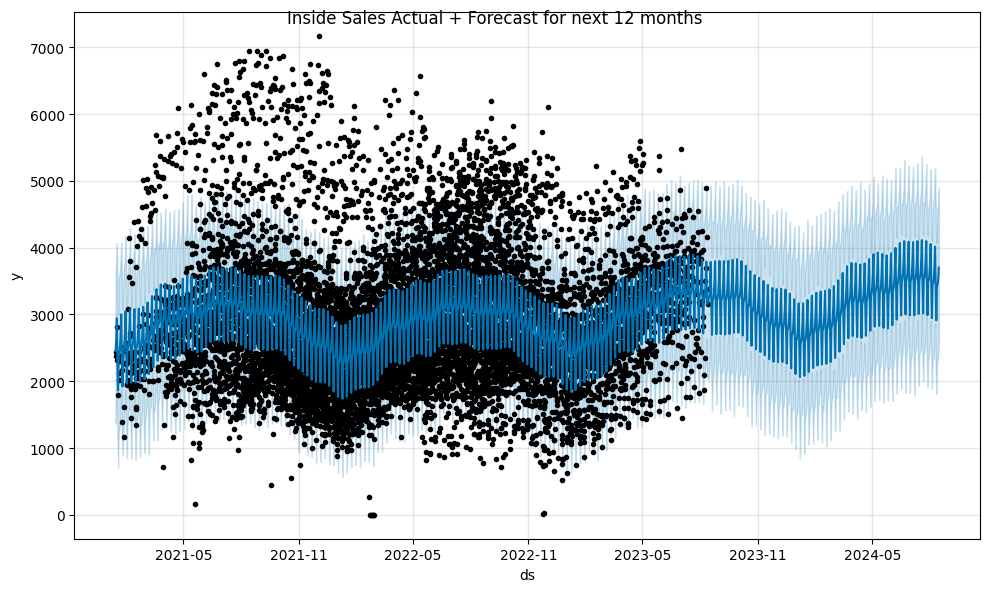

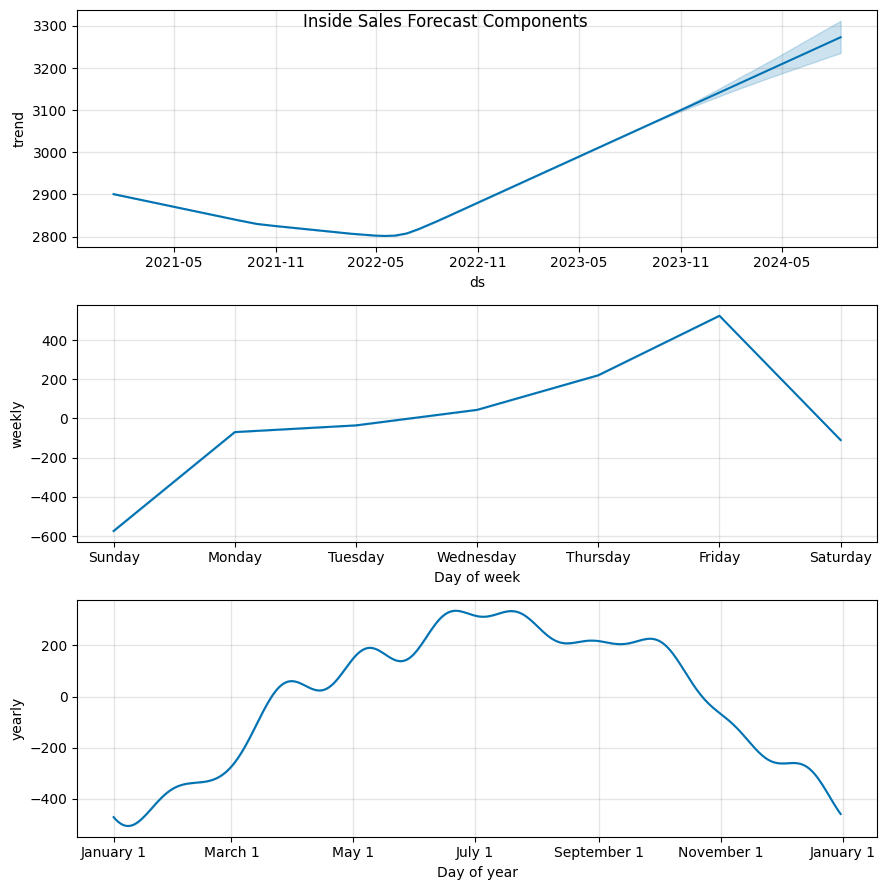

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet

# Assuming you have a DataFrame called train_data
inside_sales_train = train_data[['calendar.calendar_day_date', 'daily_yoy_ndt.total_inside_sales']]
inside_sales_train.rename(columns={'calendar.calendar_day_date': 'ds', 'daily_yoy_ndt.total_inside_sales': 'y'}, inplace=True)


# Define and fit the Prophet model for inside sales
inside_sales_model = Prophet()
inside_sales_model.fit(inside_sales_train)

# Generate future date range for inside sales forecasting (365 days)
future_inside_sales = inside_sales_model.make_future_dataframe(periods=365)

# Make predictions for inside sales
forecast_inside_sales = inside_sales_model.predict(future_inside_sales)

# Access forecasted values for inside sales
forecasted_values_inside_sales = forecast_inside_sales[['ds', 'yhat']]

# Visualize the forecast and components for inside sales
fig_inside_sales = inside_sales_model.plot(forecast_inside_sales)
fig_inside_sales_components = inside_sales_model.plot_components(forecast_inside_sales)

# Set titles for the plots
fig_inside_sales.suptitle("Inside Sales Actual + Forecast for next 12 months")
fig_inside_sales_components.suptitle("Inside Sales Forecast Components")

# Assuming you have your actual values (ground truth) for the validation period
actual_values = test_data['daily_yoy_ndt.total_inside_sales'].tail(365).values

# Extract forecasted values for the validation period
forecasted_values = forecasted_values_inside_sales.tail(365)['yhat'].values

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, forecasted_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecasted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(actual_values, forecasted_values)

print(f"-----------------------Features---------------------------")

print(f'Mean Absolute Error- MAE: {mae}')
print(f'Mean Squared Error- MSE: {mse}')
print(f'Root Mean Square Error- RMSE: {rmse}')
print(f'R2:R-squared{r2}')




##**The Time series forecast indicates the Inside sales for the next 1 year**


###**The three plots obtained are components of inside sales forecasting using the Prophet model. These plots help visualize the model's predictions and identify patterns and trends in the data.**

##*Plot 1: Forecasted Values and Uncertainty Intervals*

###**This plot shows the forecasted values for inside sales over the next 365 days, along with uncertainty intervals. The forecasted values represent the model's predictions for the 'daily_yoy_ndt.total_inside_sales' variable. The blue line represents the overall trend, and the shaded gray area represents the uncertainty intervals. The uncertainty intervals indicate the range within which the model is confident the actual values will fall.**

##*Plot 2: Trend Component*

###**This plot shows the trend component of the inside sales data. The trend component captures the overall long-term direction of the time series. It helps understand the underlying growth or decline in sales over time.**

##*Plot 3: Seasonality Component*

###**This plot shows the seasonality component of the inside sales data. The seasonality component captures the periodic fluctuations in sales that occur within a year. It helps identify seasonal patterns, such as increased sales during certain months or holidays.**

###**Highest Inside sales are on Friday , with lowest sales on Sunday**

###**Highest Inside sales are in August to September months, with lowest sales near January**

###**By analyzing these plots, we can gain insights into the factors that influence inside sales and make informed decisions about sales strategies and resource allocation.**

## <a name = "initexp22"> *3.3 Total Food Service Sales*

<ipython-input-103-c4403c841e4b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_service_train.rename(columns={'calendar.calendar_day_date': 'ds', 'daily_yoy_ndt.total_food_service': 'y'}, inplace=True)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcw905kue/2s55jps9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcw905kue/gxoly90h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94984', 'data', 'file=/tmp/tmpcw905kue/2s55jps9.json', 'init=/tmp/tmpcw905kue/gxoly90h.json', 'output', 'file=/tmp/tmpcw905kue/prophet_modelr9sm3ily/prophet_model-20231111232141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:21:41 - cmdstanpy - INFO - Chain [1] st

-----------------------Features---------------------------
Mean Absolute Error- MAE: 325.3608875609529
Mean Squared Error- MSE: 161153.13459088575
Root Mean Square Error- RMSE: 401.43883044728716
R2:R-squared-0.49217386879986


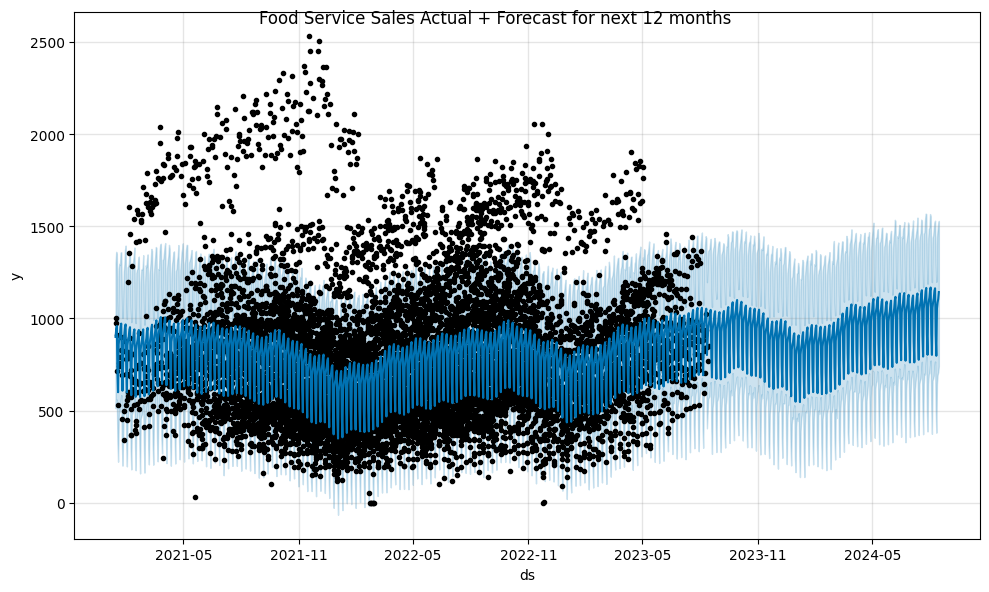

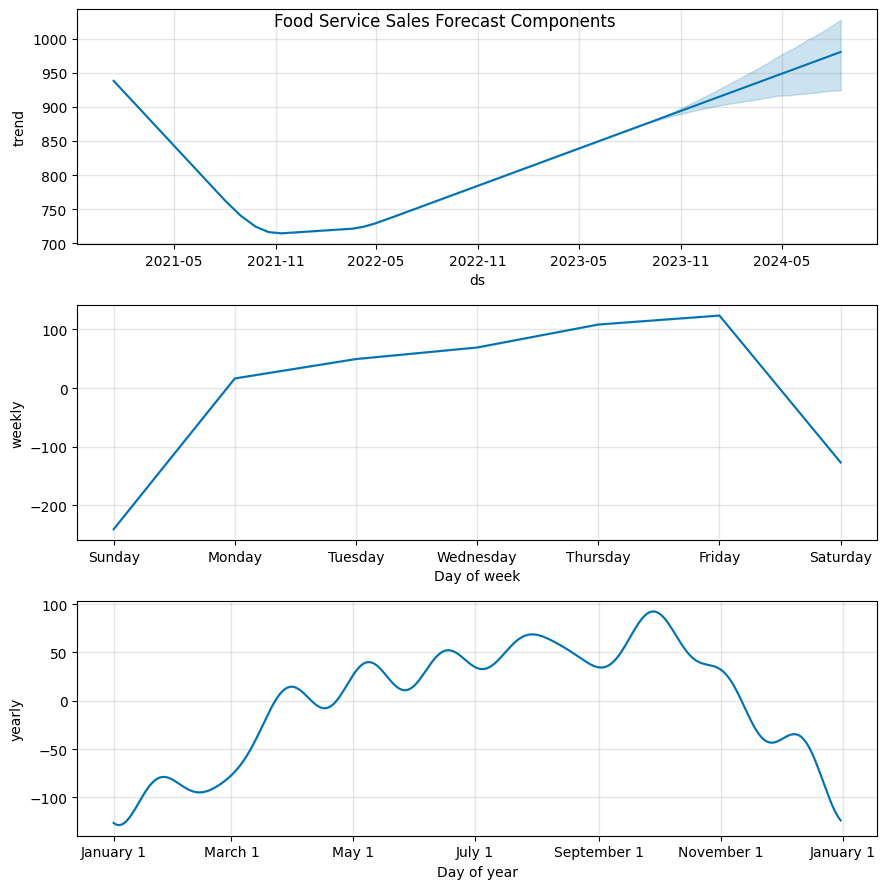

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet

# Assuming you have a DataFrame called train_data
food_service_train = train_data[['calendar.calendar_day_date', 'daily_yoy_ndt.total_food_service']]
food_service_train.rename(columns={'calendar.calendar_day_date': 'ds', 'daily_yoy_ndt.total_food_service': 'y'}, inplace=True)

# Define and fit the Prophet model for food service sales
food_service_model = Prophet()
food_service_model.fit(food_service_train)

# Generate future date range for food service sales forecasting (365 days)
future_food_service = food_service_model.make_future_dataframe(periods=365)

# Make predictions for food service sales
forecast_food_service = food_service_model.predict(future_food_service)

# Access forecasted values for food service sales
forecasted_values_food_service = forecast_food_service[['ds', 'yhat']]

# Visualize the forecast and components for food service sales
fig_food_service = food_service_model.plot(forecast_food_service)
fig_food_service_components = food_service_model.plot_components(forecast_food_service)

# Set titles for the plots
fig_food_service.suptitle("Food Service Sales Actual + Forecast for next 12 months")
fig_food_service_components.suptitle("Food Service Sales Forecast Components")

# Assuming you have your actual values (ground truth) for the validation period
actual_values = test_data['daily_yoy_ndt.total_food_service'].tail(365).values

# Extract forecasted values for the validation period
forecasted_values = forecasted_values_food_service.tail(365)['yhat'].values

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, forecasted_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecasted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(actual_values, forecasted_values)

print(f"-----------------------Features---------------------------")

print(f'Mean Absolute Error- MAE: {mae}')
print(f'Mean Squared Error- MSE: {mse}')
print(f'Root Mean Square Error- RMSE: {rmse}')
print(f'R2:R-squared{r2}')


##**The Time series forecast indicates the Total Food sales for the next 1 year**


###**The three plots obtained are components of Food sales forecasting using the Prophet model. These plots help visualize the model's predictions and identify patterns and trends in the data.**

##*Plot 1: Forecasted Values and Uncertainty Intervals*

###**This plot shows the forecasted values for Food sales over the next 365 days, along with uncertainty intervals. The forecasted values represent the model's predictions for the 'daily_yoy_ndt.total_food_service' variable. The blue line represents the overall trend, and the shaded blue area represents the uncertainty intervals. The uncertainty intervals indicate the range within which the model is confident the actual values will fall.**

##*Plot 2: Trend Component*

###**This plot shows the trend component of the Food sales data. The trend component captures the overall long-term direction of the time series. It helps understand the underlying growth or decline in sales over time.**


##*Plot 3: Seasonality Component*

###**This plot shows the seasonality component of the Food sales data. The seasonality component captures the periodic fluctuations in sales that occur within a year. It helps identify seasonal patterns, such as increased sales during certain months or holidays.**

###**Highest Food sales are on Friday , with lowest sales on Sunday**

###**Highest Food sales are in October month, with lowest sales near January**

###**By analyzing these plots, we can gain insights into the factors that influence food sales and make informed decisions about sales strategies and resource allocation.**

## <a name = "initexp23">*3.4 Total Diesel Sales*

<ipython-input-104-68463db684b8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diesel_train.rename(columns={'calendar.calendar_day_date': 'ds', 'diesel': 'y'}, inplace=True)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcw905kue/koysj68s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcw905kue/bzwdsq9m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34478', 'data', 'file=/tmp/tmpcw905kue/koysj68s.json', 'init=/tmp/tmpcw905kue/bzwdsq9m.json', 'output', 'file=/tmp/tmpcw905kue/prophet_model9n_81_55/prophet_model-20231111232146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:21:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Ch

-----------------------Features---------------------------
Mean Absolute Error- MAE: 1268.3773544811488
Mean Squared Error- MSE: 3139399.9493940254
Root Mean Square Error- RMSE: 1771.835192503531
R2:R-squared-0.06722174488757537


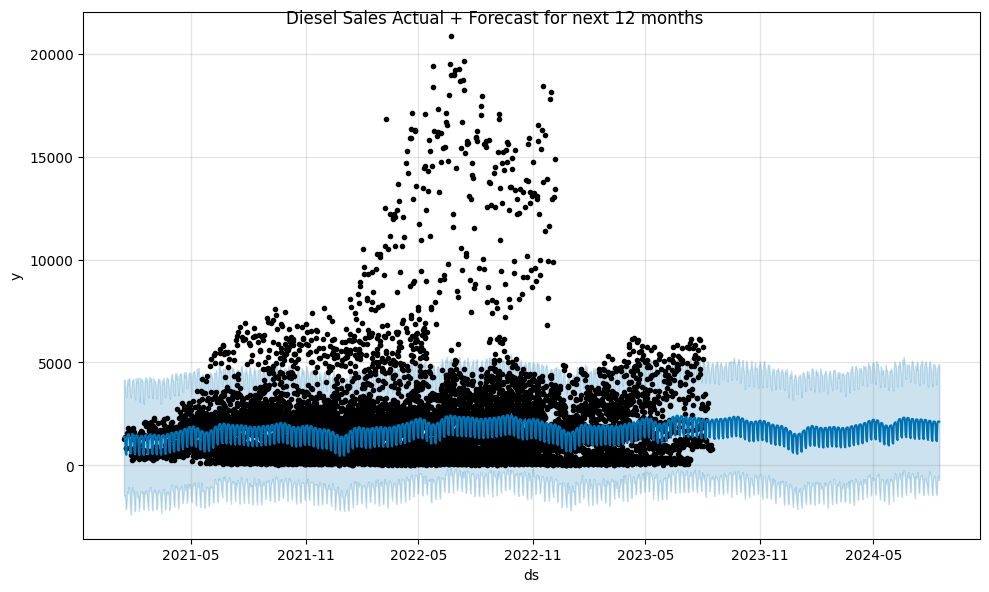

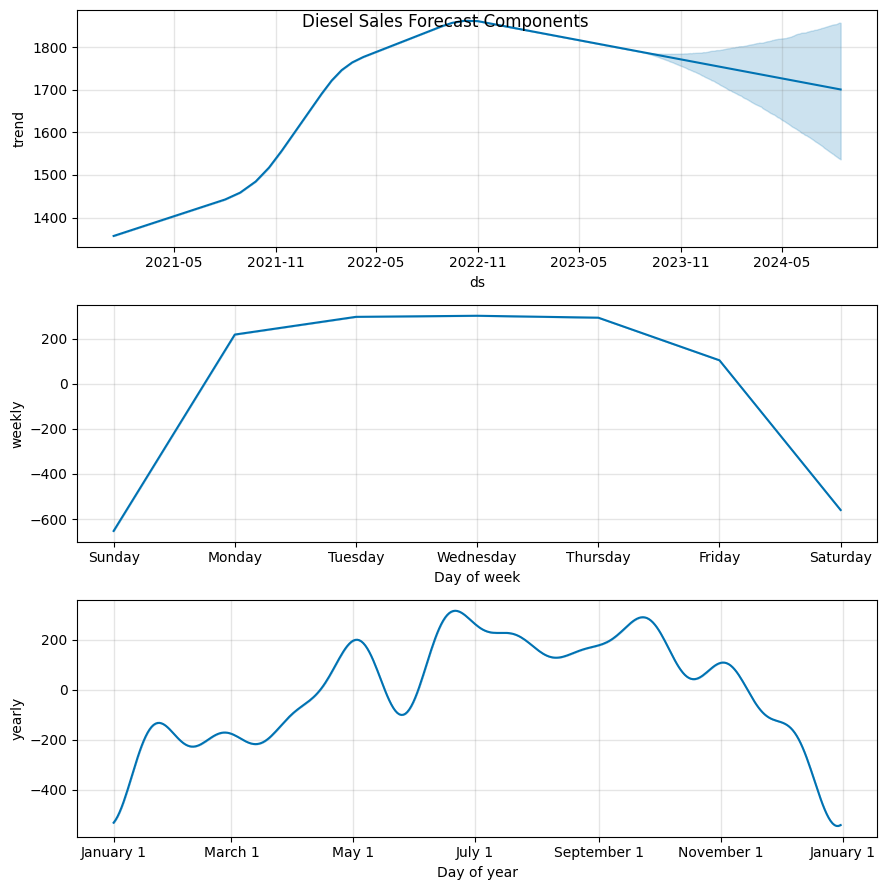

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet

# Assuming we have a DataFrame called train_data
diesel_train = train_data[['calendar.calendar_day_date', 'diesel']]
diesel_train.rename(columns={'calendar.calendar_day_date': 'ds', 'diesel': 'y'}, inplace=True)

# Define and fit the Prophet model for diesel sales
diesel_model = Prophet()
diesel_model.fit(diesel_train)

# Generate future date range for diesel sales forecasting (365 days)
future_diesel = diesel_model.make_future_dataframe(periods=365)

# Make predictions for diesel sales
forecast_diesel = diesel_model.predict(future_diesel)

# Access forecasted values for diesel sales
forecasted_values_diesel = forecast_diesel[['ds', 'yhat']]

# Visualize the forecast and components for diesel sales
fig_diesel = diesel_model.plot(forecast_diesel)
fig_diesel_components = diesel_model.plot_components(forecast_diesel)

# Set titles for the plots
fig_diesel.suptitle("Diesel Sales Actual + Forecast for next 12 months")
fig_diesel_components.suptitle("Diesel Sales Forecast Components")

# Assuming we have your actual values (ground truth) for the validation period
actual_values = test_data['diesel'].tail(365).values

# Extract forecasted values for the validation period
forecasted_values = forecasted_values_diesel.tail(365)['yhat'].values

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, forecasted_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecasted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(actual_values, forecasted_values)

print(f"-----------------------Features---------------------------")

print(f'Mean Absolute Error- MAE: {mae}')
print(f'Mean Squared Error- MSE: {mse}')
print(f'Root Mean Square Error- RMSE: {rmse}')
print(f'R2:R-squared{r2}')




##**The Time series forecast indicates the Diesel sales for the next 1 year**


###**The three plots obtained are components of Diesel sales forecasting using the Prophet model. These plots help visualize the model's predictions and identify patterns and trends in the data.**

##*Plot 1: Forecasted Values and Uncertainty Intervals*

###**This plot shows the forecasted values for Diesel sales over the next 365 days, along with uncertainty intervals. The forecasted values represent the model's predictions for the 'diesel' variable. The blue line represents the overall trend, and the shaded blue area represents the uncertainty intervals. The uncertainty intervals indicate the range within which the model is confident the actual values will fall.**

##*Plot 2: Trend Component*

###**This plot shows the trend component of the Diesel sales data. The trend component captures the overall long-term direction of the time series. It helps understand the underlying growth or decline in sales over time.**


##*Plot 3: Seasonality Component*

###**This plot shows the seasonality component of the Diesel sales data. The seasonality component captures the periodic fluctuations in sales that occur within a year. It helps identify seasonal patterns, such as increased sales during certain months or holidays.**

###**Highest Diesel sales are on Wednesday , with lowest sales on Sunday**

###**Highest Diesel sales are in July month, with lowest sales near January**

###**By analyzing these plots, we can gain insights into the factors that influence Diesel sales and make informed decisions about sales strategies and resource allocation.**

## <a name = "initexp24"> *3.5 Total Unleaded Sales*

<ipython-input-105-60cd7a72131b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unleaded_train.rename(columns={'calendar.calendar_day_date': 'ds', 'unleaded': 'y'}, inplace=True)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcw905kue/ewo1qi1w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcw905kue/d05oa08l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5696', 'data', 'file=/tmp/tmpcw905kue/ewo1qi1w.json', 'init=/tmp/tmpcw905kue/d05oa08l.json', 'output', 'file=/tmp/tmpcw905kue/prophet_modelmx3v81kx/prophet_model-20231111232149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:21:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy

-----------------------Features---------------------------
Mean Absolute Error- MAE: 793.8829961059837
Mean Squared Error- MSE: 1090062.143175371
Root Mean Square Error- RMSE: 1044.060411650289
R2:R-squared-0.0944194610733573


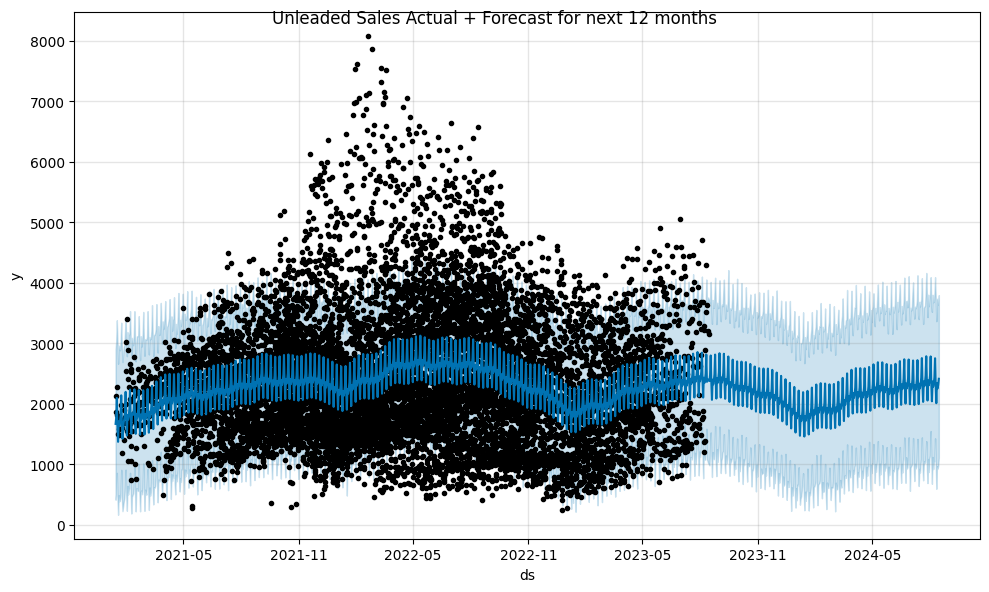

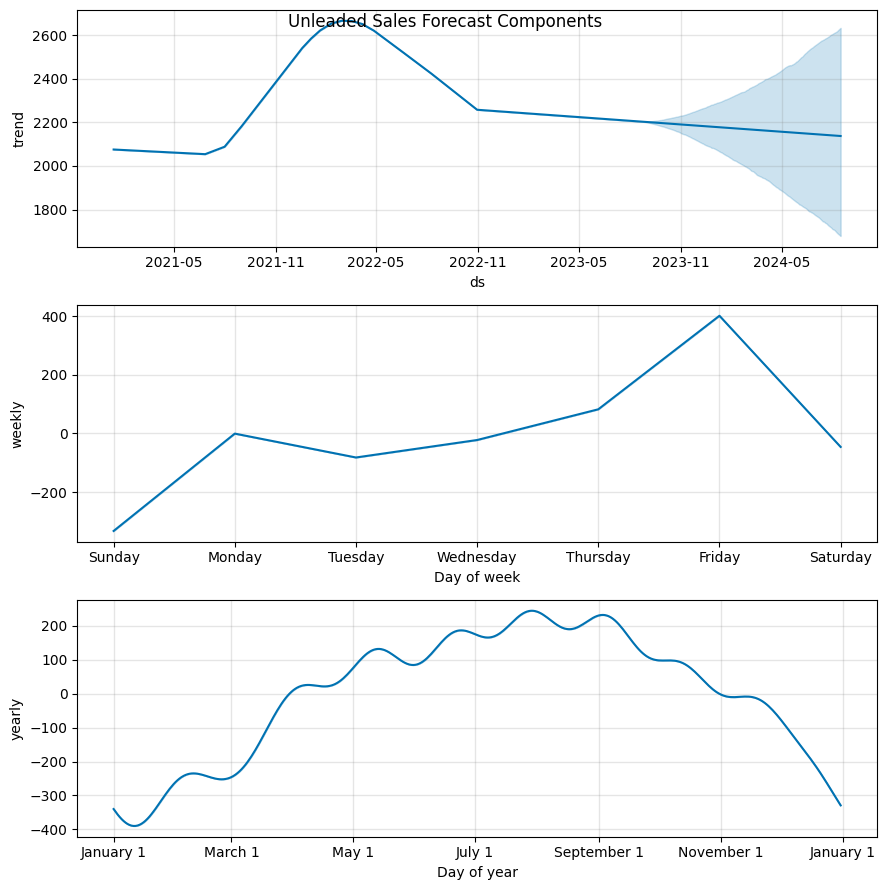

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet

# Assuming you have a DataFrame called train_data
unleaded_train = train_data[['calendar.calendar_day_date', 'unleaded']]
unleaded_train.rename(columns={'calendar.calendar_day_date': 'ds', 'unleaded': 'y'}, inplace=True)

# Define and fit the Prophet model for unleaded sales
unleaded_model = Prophet()
unleaded_model.fit(unleaded_train)

# Generate future date range for unleaded sales forecasting (365 days)
future_unleaded = unleaded_model.make_future_dataframe(periods=365)

# Make predictions for unleaded sales
forecast_unleaded = unleaded_model.predict(future_unleaded)

# Access forecasted values for unleaded sales
forecasted_values_unleaded = forecast_unleaded[['ds', 'yhat']]

# Visualize the forecast and components for unleaded sales
fig_unleaded = unleaded_model.plot(forecast_unleaded)
fig_unleaded_components = unleaded_model.plot_components(forecast_unleaded)

# Set titles for the plots
fig_unleaded.suptitle("Unleaded Sales Actual + Forecast for next 12 months")
fig_unleaded_components.suptitle("Unleaded Sales Forecast Components")

# Assuming you have your actual values (ground truth) for the validation period
actual_values = test_data['unleaded'].tail(365).values

# Extract forecasted values for the validation period
forecasted_values = forecasted_values_unleaded.tail(365)['yhat'].values

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, forecasted_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecasted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(actual_values, forecasted_values)

print(f"-----------------------Features---------------------------")

print(f'Mean Absolute Error- MAE: {mae}')
print(f'Mean Squared Error- MSE: {mse}')
print(f'Root Mean Square Error- RMSE: {rmse}')
print(f'R2:R-squared{r2}')


##**The Time series forecast indicates the Unleaded sales for the next 1 year**


###**The three plots obtained are components of Unleaded sales forecasting using the Prophet model. These plots help visualize the model's predictions and identify patterns and trends in the data.**

##*Plot 1: Forecasted Values and Uncertainty Intervals*

###**This plot shows the forecasted values for Unleaded sales over the next 365 days, along with uncertainty intervals. The forecasted values represent the model's predictions for the 'Unleaded' variable. The blue line represents the overall trend, and the shaded blue area represents the uncertainty intervals. The uncertainty intervals indicate the range within which the model is confident the actual values will fall.**

##*Plot 2: Trend Component*

###**This plot shows the trend component of the Unleaded sales data. The trend component captures the overall long-term direction of the time series. It helps understand the underlying growth or decline in sales over time.**


##*Plot 3: Seasonality Component*

###**This plot shows the seasonality component of the Unleaded sales data. The seasonality component captures the periodic fluctuations in sales that occur within a year. It helps identify seasonal patterns, such as increased sales during certain months or holidays.**

###**Highest Unleaded sales are on Friday , with lowest sales on Sunday**

###**Highest Unleaded sales are in the month of August, with lowest sales near January**

###**By analyzing these plots, we can gain insights into the factors that influence Unleaded sales and make informed decisions about sales strategies and resource allocation.**

In [1]:
from tabulate import tabulate

data = [
    ['daily_yoy_ndt.total_inside_sales', '911.23','1280792.08', '1131.72'],
    ['daily_yoy_ndt.total_food_service', '325.36', '161153.13', '401.43'],
    ['Diesel', '1268.37', '3139399.94', '1771.83',],
    ['Unleaded', '793.88', '1090062.14', '1044.06']
]

title = "Prophet Best Model Results"


print("\n" + title)
print(tabulate(data, headers=['Output Variables','MAE', 'MSE', 'RMSE'], tablefmt='fancy_grid'))



Prophet Best Model Results
╒══════════════════════════════════╤═════════╤══════════════════╤═════════╕
│ Output Variables                 │     MAE │              MSE │    RMSE │
╞══════════════════════════════════╪═════════╪══════════════════╪═════════╡
│ daily_yoy_ndt.total_inside_sales │  911.23 │      1.28079e+06 │ 1131.72 │
├──────────────────────────────────┼─────────┼──────────────────┼─────────┤
│ daily_yoy_ndt.total_food_service │  325.36 │ 161153           │  401.43 │
├──────────────────────────────────┼─────────┼──────────────────┼─────────┤
│ Diesel                           │ 1268.37 │      3.1394e+06  │ 1771.83 │
├──────────────────────────────────┼─────────┼──────────────────┼─────────┤
│ Unleaded                         │  793.88 │      1.09006e+06 │ 1044.06 │
╘══════════════════════════════════╧═════════╧══════════════════╧═════════╛


## <a name = "initexp28"> **Summary**


Across the different forecasting models for daily year-over-year inside sales, food service sales, diesel, and unleaded fuel sales, the models demonstrate varying degrees of predictive accuracy, with R2 scores ranging from moderate to good. The models for inside sales and food service sales show relatively high R2 values, indicating that they are able to explain a substantial portion of the variance in the respective sales figures. The unleaded sales model also reflects a good fit, with its R2 score illustrating that it captures the variance well across the stores. However, the diesel sales model exhibits a lower average R2, suggesting a weaker predictive capability.

The RMSE values across all models show that there is room for improvement in the prediction accuracy, with particular attention needed for specific stores where the predictions were less accurate. Notably, the RMSE for diesel sales is significantly higher than for other categories, indicating larger discrepancies between the predicted and actual sales.

The wide range of MSE and RMSE values across stores for each model indicates inconsistencies in model performance, which could be due to store-specific factors not accounted for in the models.

## <a name = "initexp29"> **Conclusion**

Implementing the XGBoost Regressor to forecast the target features by predicting test stores individually as well as applying cross validations we observe that the Average RMSE and R2 score in both cases are almost similar.

a. **daily_yoy_ndt.total_inside_sales:**

Average MSE: 260221.35414967436, Average RMSE: 443.231123312014, Average R2: 0.67289066188858668

b. **daily_yoy_ndt.total_food_service:**

Average MSE: 25179.288356393925, Average RMSE: 133.4489969024974, Average R2: 0.7005246058034572

c. **diesel:**
Average MSE: 145828.62205081654, Average RMSE: 355.41704329040044, Average R2: 0.908387804544341

d. **unleaded:** Average MSE: 94787.05561354483, Average RMSE: 299.72149068909425, Average R2: 0.888974035066647

In conclusion, while the models are generally effective at forecasting sales across different categories, the results highlight the possibility of overfitting and the need for further refinement. This could include incorporating additional location-specific variables, adjusting model parameters, or exploring different modeling techniques to improve predictive accuracy and consistency across all stores. The disparities in model performance suggest that a one-size-fits-all model may not be optimal and that a more customized approach may be necessary to address the nuances of each store's sales dynamics.

## <a name = "initexp30">**Contributions**

## <a name = "initexp34">Vinay Kumar Vascuri

I created Prophet Model. Presented the results of Prophet Model along with visualizations, provided the write up for Introduction, summary of the visualizations and the logics.